In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
data = pd.read_csv("housing.csv")

In [3]:
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [6]:
data.dropna(inplace=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [8]:
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis=1)
y = data['median_house_value']

In [9]:
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,NEAR BAY
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,INLAND


In [10]:
y

0        452600.0
1        358500.0
2        352100.0
3        341300.0
4        342200.0
           ...   
20635     78100.0
20636     77100.0
20637     92300.0
20638     84700.0
20639     89400.0
Name: median_house_value, Length: 20433, dtype: float64

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
train_data = X_train.join(y_train)

In [13]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
14052,-117.14,32.76,24.0,3523.0,991.0,1775.0,873.0,2.1273,NEAR OCEAN,142300.0
20367,-118.94,34.16,3.0,1170.0,148.0,493.0,142.0,8.0428,<1H OCEAN,500001.0
2481,-120.43,36.18,29.0,579.0,116.0,218.0,99.0,2.1458,INLAND,104200.0
9034,-117.76,34.71,15.0,2981.0,625.0,1694.0,540.0,2.9541,INLAND,106700.0
486,-122.26,37.86,52.0,3497.0,832.0,1493.0,794.0,2.9044,NEAR BAY,257400.0
...,...,...,...,...,...,...,...,...,...,...
6303,-117.90,33.99,18.0,8076.0,1789.0,5325.0,1707.0,3.4430,<1H OCEAN,171900.0
20113,-119.57,37.94,17.0,346.0,130.0,51.0,20.0,3.4861,INLAND,137500.0
19303,-122.82,38.38,27.0,2565.0,479.0,1227.0,467.0,4.5132,<1H OCEAN,259900.0
6678,-118.10,34.15,14.0,1442.0,369.0,782.0,343.0,2.7431,INLAND,177500.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

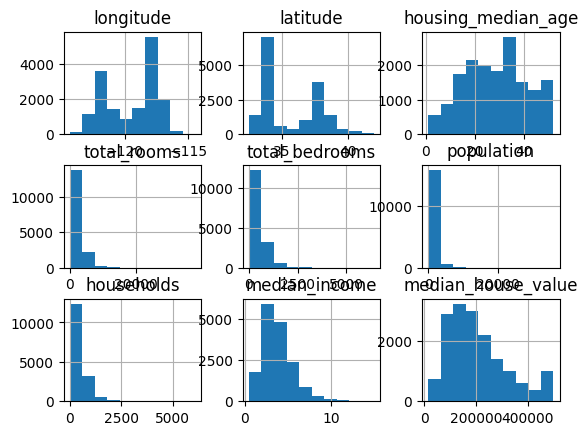

In [14]:
train_data.hist()

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

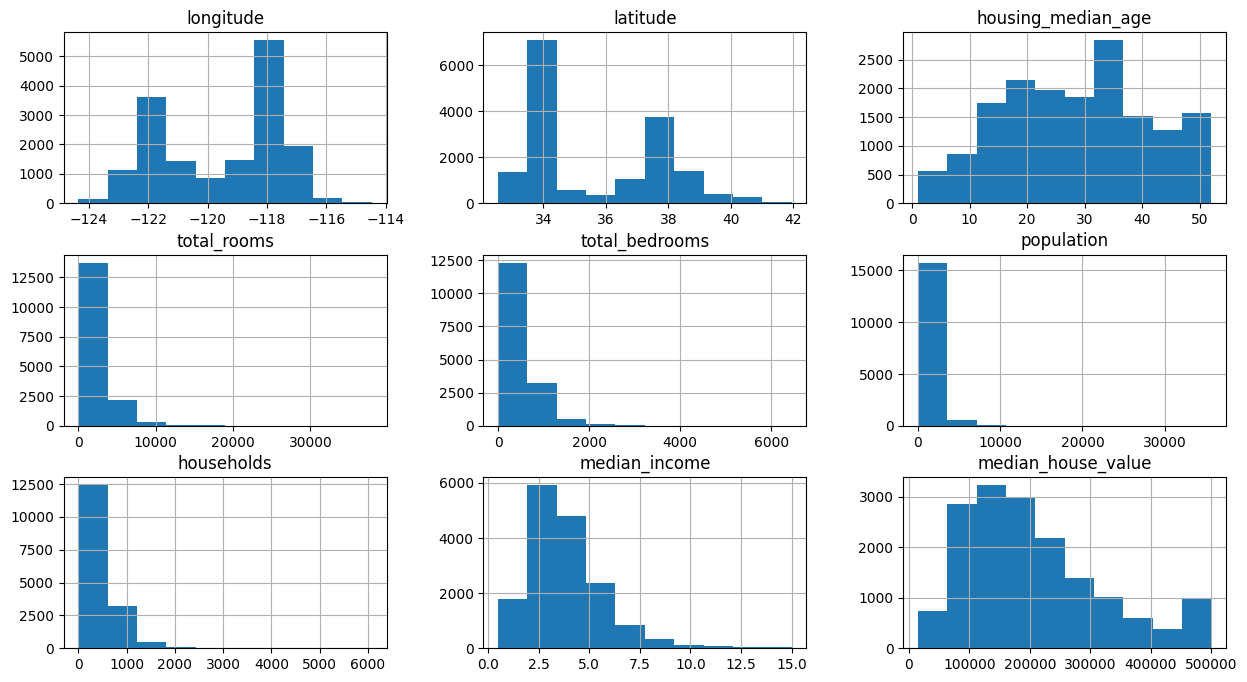

In [15]:
train_data.hist(figsize=(15,8))

In [16]:
train_data.corr(numeric_only=True)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.922883,-0.106889,0.045122,0.070099,0.101108,0.056798,-0.021382,-0.048271
latitude,-0.922883,1.000000,0.007111,-0.037046,-0.067585,-0.110038,-0.072193,-0.075817,-0.144372
housing_median_age,-0.106889,0.007111,1.000000,-0.357065,-0.317235,-0.290709,-0.299354,-0.116534,0.109671
total_rooms,0.045122,-0.037046,-0.357065,1.000000,0.930980,0.852827,0.918978,0.193724,0.133304
total_bedrooms,0.070099,-0.067585,-0.317235,0.930980,1.000000,0.873653,0.979297,-0.011215,0.049614
population,0.101108,-0.110038,-0.290709,0.852827,0.873653,1.000000,0.903801,-0.000809,-0.027264
households,0.056798,-0.072193,-0.299354,0.918978,0.979297,0.903801,1.000000,0.008823,0.063806
median_income,-0.021382,-0.075817,-0.116534,0.193724,-0.011215,-0.000809,0.008823,1.000000,0.686015
median_house_value,-0.048271,-0.144372,0.109671,0.133304,0.049614,-0.027264,0.063806,0.686015,1.000000


<Axes: >

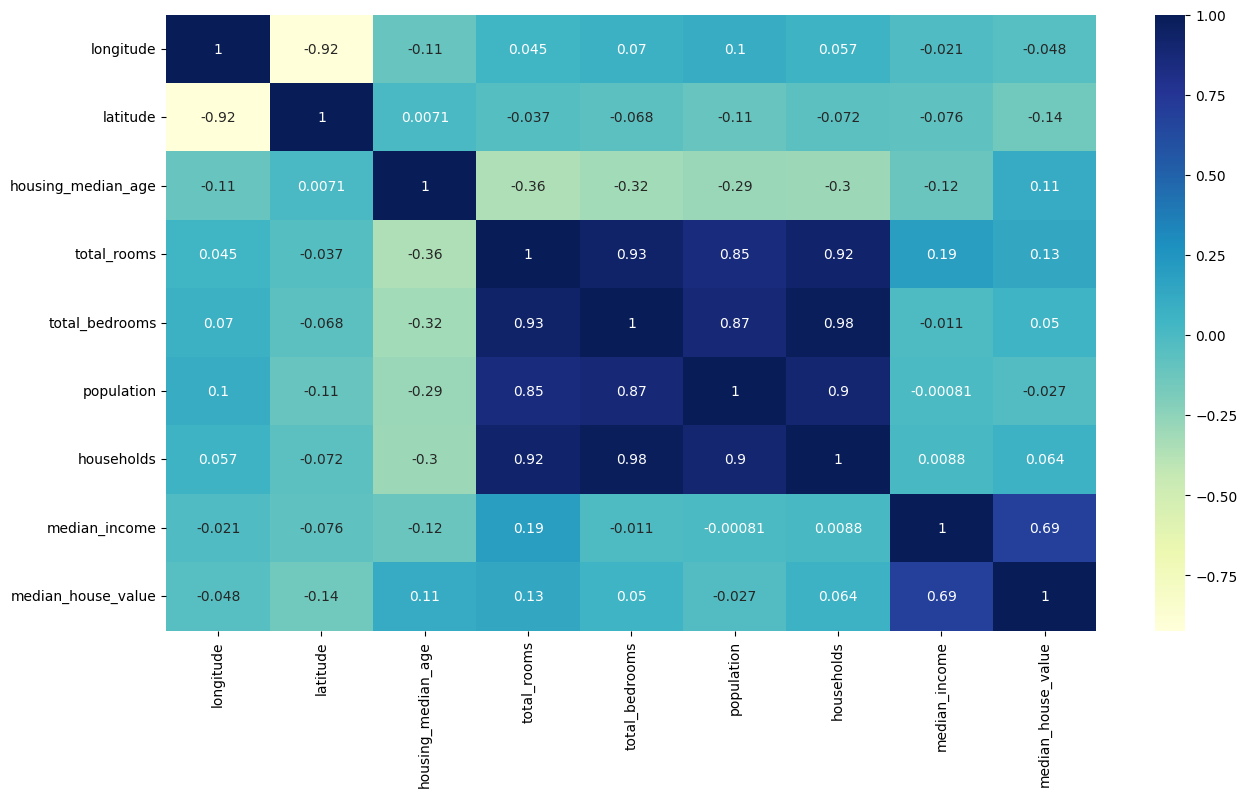

In [17]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [18]:
train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

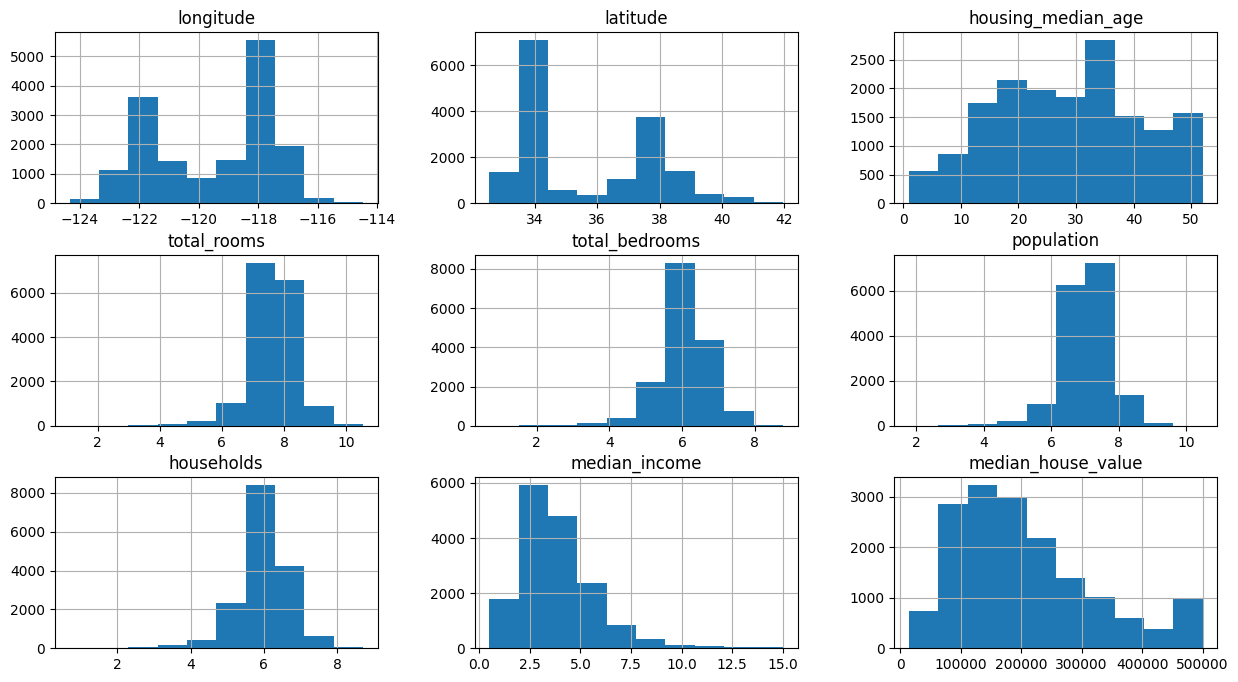

In [19]:
train_data.hist(figsize=(15,8))

In [20]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7195
INLAND        5216
NEAR OCEAN    2099
NEAR BAY      1832
ISLAND           4
Name: count, dtype: int64

In [21]:
pd.get_dummies(train_data.ocean_proximity)

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14052,False,False,False,False,True
20367,True,False,False,False,False
2481,False,True,False,False,False
9034,False,True,False,False,False
486,False,False,False,True,False
...,...,...,...,...,...
6303,True,False,False,False,False
20113,False,True,False,False,False
19303,True,False,False,False,False
6678,False,True,False,False,False


In [22]:
train_data.join(pd.get_dummies(train_data.ocean_proximity))

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14052,-117.14,32.76,24.0,8.167352,6.899723,7.482119,6.773080,2.1273,NEAR OCEAN,142300.0,False,False,False,False,True
20367,-118.94,34.16,3.0,7.065613,5.003946,6.202536,4.962845,8.0428,<1H OCEAN,500001.0,True,False,False,False,False
2481,-120.43,36.18,29.0,6.363028,4.762174,5.389072,4.605170,2.1458,INLAND,104200.0,False,True,False,False,False
9034,-117.76,34.71,15.0,8.000349,6.439350,7.435438,6.293419,2.9541,INLAND,106700.0,False,True,False,False,False
486,-122.26,37.86,52.0,8.159947,6.725034,7.309212,6.678342,2.9044,NEAR BAY,257400.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,-117.90,33.99,18.0,8.996776,7.489971,8.580356,7.443078,3.4430,<1H OCEAN,171900.0,True,False,False,False,False
20113,-119.57,37.94,17.0,5.849325,4.875197,3.951244,3.044522,3.4861,INLAND,137500.0,False,True,False,False,False
19303,-122.82,38.38,27.0,7.850104,6.173786,7.113142,6.148468,4.5132,<1H OCEAN,259900.0,True,False,False,False,False
6678,-118.10,34.15,14.0,7.274480,5.913503,6.663133,5.840642,2.7431,INLAND,177500.0,False,True,False,False,False


In [23]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

In [24]:
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
14052,-117.14,32.76,24.0,8.167352,6.899723,7.482119,6.773080,2.1273,142300.0,False,False,False,False,True
20367,-118.94,34.16,3.0,7.065613,5.003946,6.202536,4.962845,8.0428,500001.0,True,False,False,False,False
2481,-120.43,36.18,29.0,6.363028,4.762174,5.389072,4.605170,2.1458,104200.0,False,True,False,False,False
9034,-117.76,34.71,15.0,8.000349,6.439350,7.435438,6.293419,2.9541,106700.0,False,True,False,False,False
486,-122.26,37.86,52.0,8.159947,6.725034,7.309212,6.678342,2.9044,257400.0,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6303,-117.90,33.99,18.0,8.996776,7.489971,8.580356,7.443078,3.4430,171900.0,True,False,False,False,False
20113,-119.57,37.94,17.0,5.849325,4.875197,3.951244,3.044522,3.4861,137500.0,False,True,False,False,False
19303,-122.82,38.38,27.0,7.850104,6.173786,7.113142,6.148468,4.5132,259900.0,True,False,False,False,False
6678,-118.10,34.15,14.0,7.274480,5.913503,6.663133,5.840642,2.7431,177500.0,False,True,False,False,False


<Axes: >

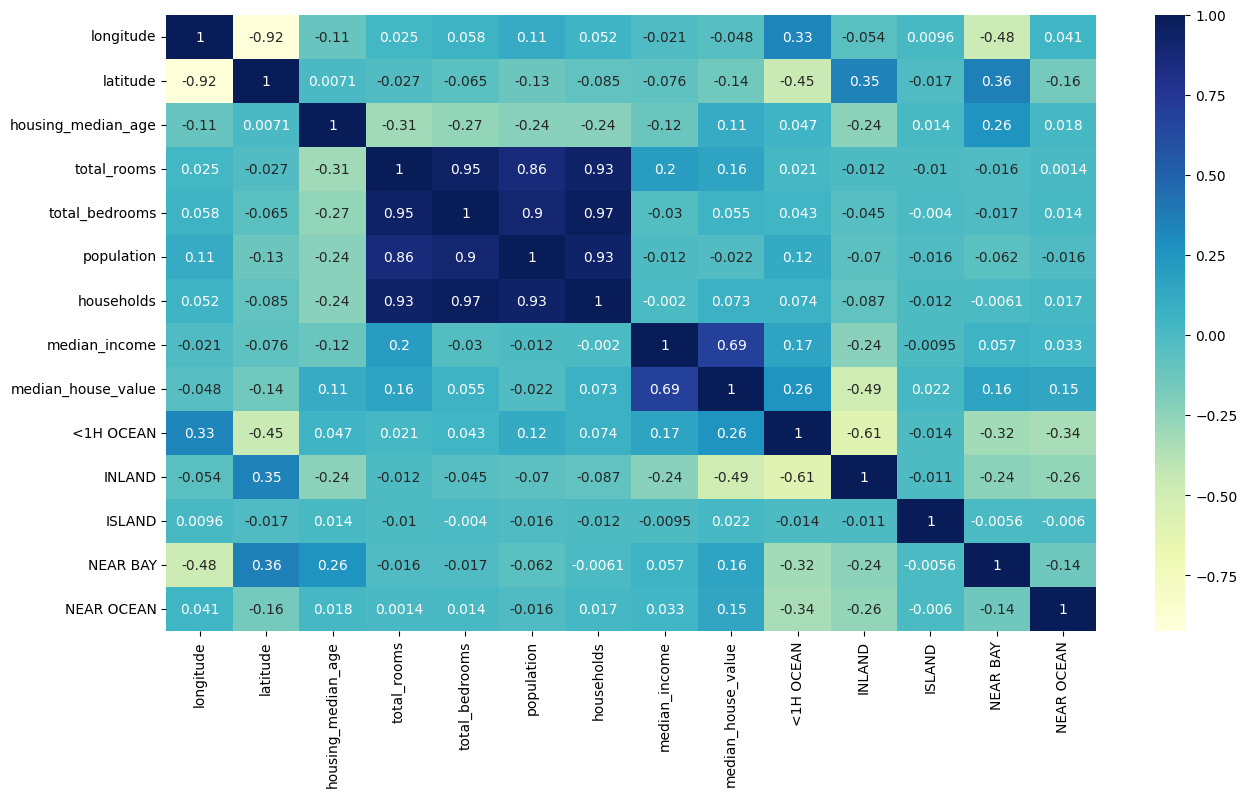

In [25]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

<Axes: xlabel='latitude', ylabel='longitude'>

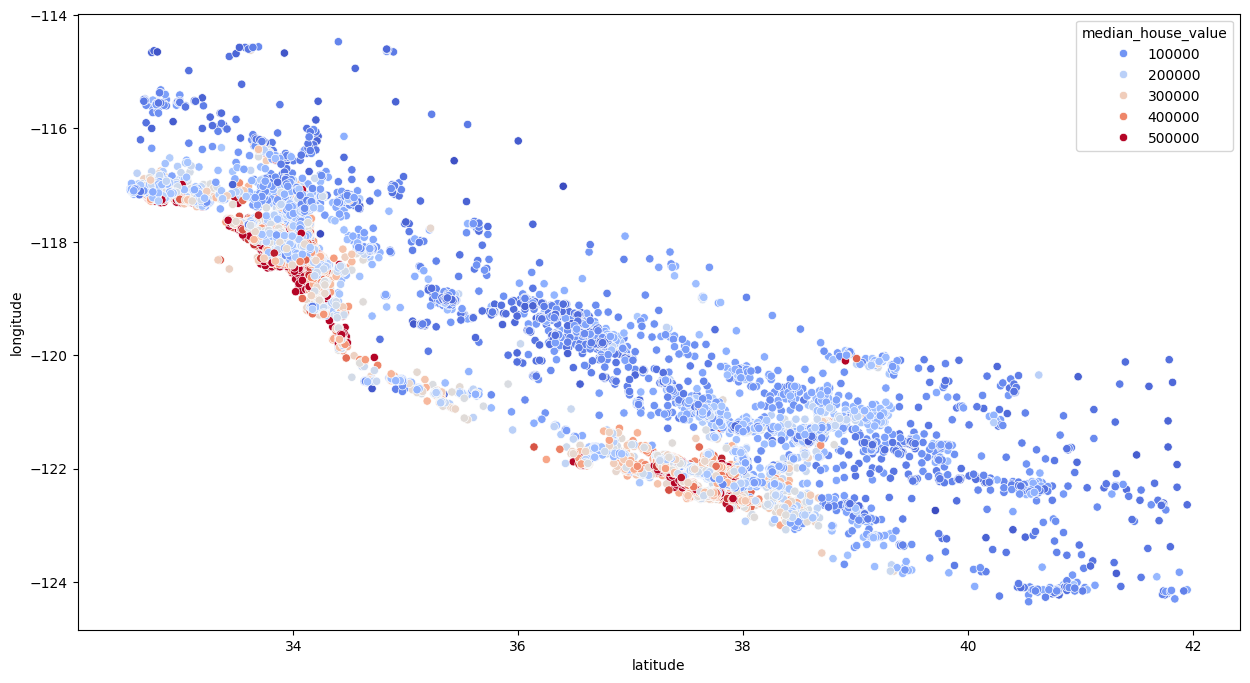

In [26]:
plt.figure(figsize=(15,8))
sns.scatterplot(x="latitude", y="longitude", data=train_data, hue="median_house_value", palette="coolwarm")

In [27]:
train_data['bdroom_ratio']=train_data['total_bedrooms']/train_data['total_rooms']
train_data['household_rooms']=train_data['total_rooms']/train_data['households']

<Axes: >

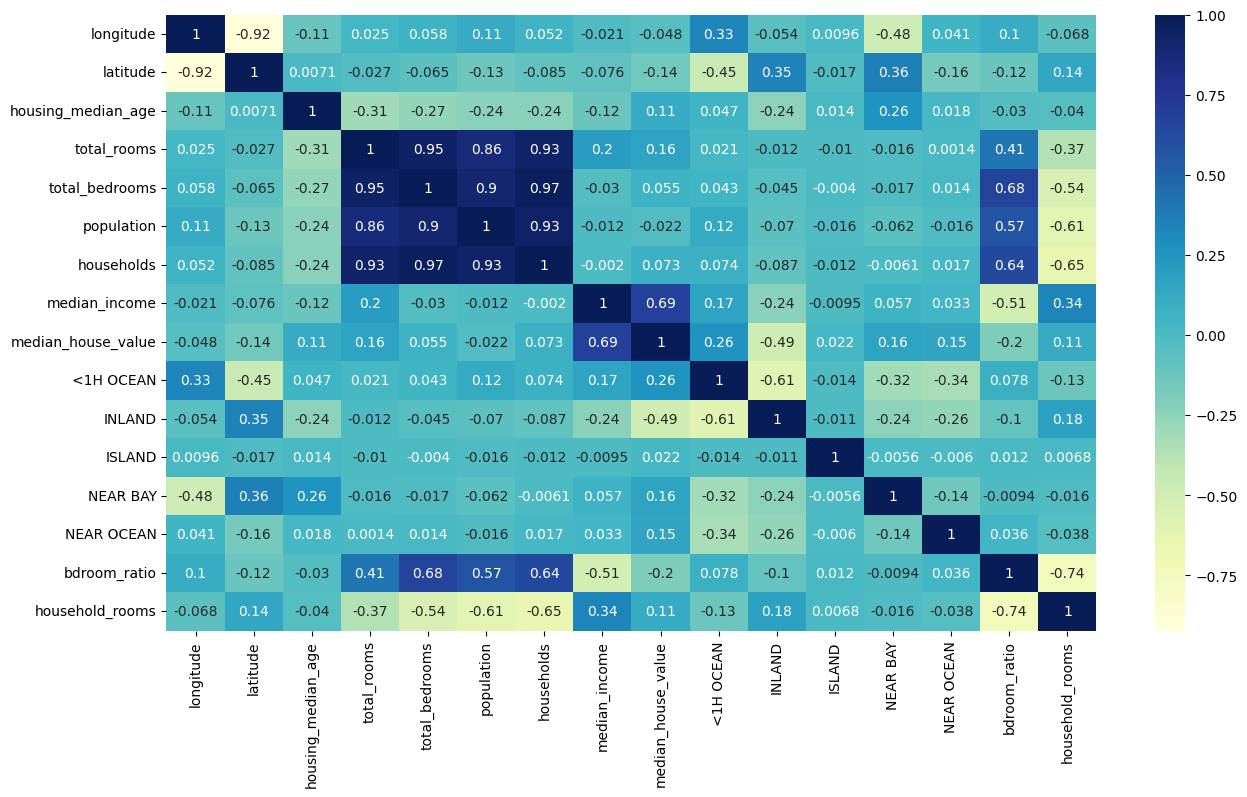

In [28]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(numeric_only=True), annot=True, cmap="YlGnBu")

In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

X_train, y_train = train_data.drop(['median_house_value'],axis=1), train_data['median_house_value']

reg = LinearRegression()

reg.fit(X_train,y_train)

LinearRegression()

In [30]:
test_data = X_test.join(y_test)

test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)

test_data = test_data.join(pd.get_dummies(test_data.ocean_proximity)).drop(['ocean_proximity'],axis=1)

test_data['bdroom_ratio']=test_data['total_bedrooms']/test_data['total_rooms']
test_data['household_rooms']=test_data['total_rooms']/test_data['households']


In [31]:
X_test, y_test = test_data.drop(['median_house_value'],axis=1), test_data['median_house_value']

In [32]:
reg.score(X_test,y_test)

0.681379049317769

In [33]:
from sklearn.ensemble import RandomForestRegressor
forest = RandomForestRegressor()
forest.fit(X_train,y_train)

RandomForestRegressor()

In [34]:
forest.score(X_test, y_test)

0.822294785886837

In [35]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    "n_estimators": [100,200,300],
    "min_samples_split": [2,4],
    "max_depth":[None,4,8]
}
grid_search = GridSearchCV(forest,param_grid,cv=5,
                           scoring="neg_mean_squared_error",
                           return_train_score=True)
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': [None, 4, 8], 'min_samples_split': [2, 4],
                         'n_estimators': [100, 200, 300]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [36]:
best_forest = grid_search.best_estimator_

In [37]:
best_forest.score(X_test,y_test)

0.8233797139486982

In [40]:
training_data_prediction = forest.predict(X_train)

In [41]:
print(training_data_prediction)

[146252.   475274.77 100234.   ... 246374.   179394.   246424.  ]


In [44]:
score_1 = metrics.r2_score(y_train, training_data_prediction)

In [45]:
score_2 = metrics.mean_absolute_error(y_train, training_data_prediction)

In [46]:
print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.9745571737603446
Mean Absolute Error: 11987.361857335129


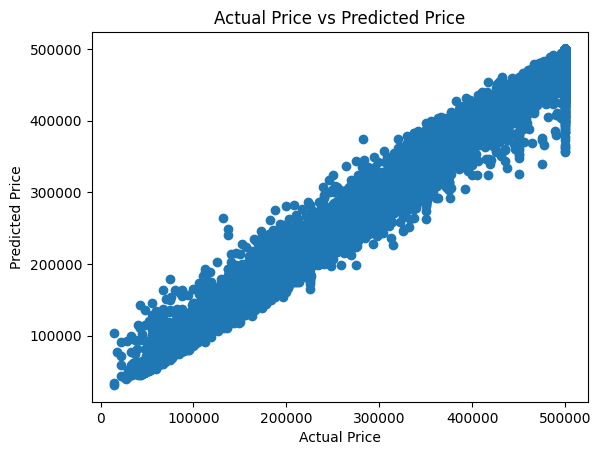

In [47]:
plt.scatter(y_train, training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual Price vs Predicted Price")
plt.show()

In [49]:
test_data_prediction = forest.predict(X_test)

In [50]:
score_1 = metrics.r2_score(y_test, test_data_prediction)

In [51]:
score_2 = metrics.mean_absolute_error(y_test, test_data_prediction)

In [52]:
print('R Sqaured Error:', score_1)
print('Mean Absolute Error:', score_2)

R Sqaured Error: 0.822294785886837
Mean Absolute Error: 31505.90752630291


In [55]:
y_pred = forest.predict(X_test)

In [58]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

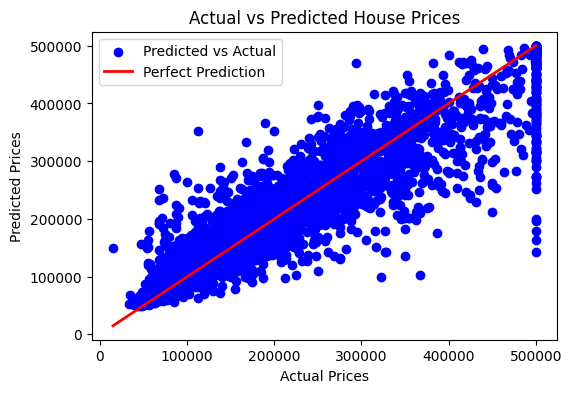

In [59]:
plt.figure(figsize=(6, 4))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linewidth=2, label='Perfect Prediction')
plt.title('Actual vs Predicted House Prices')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend()
plt.show()

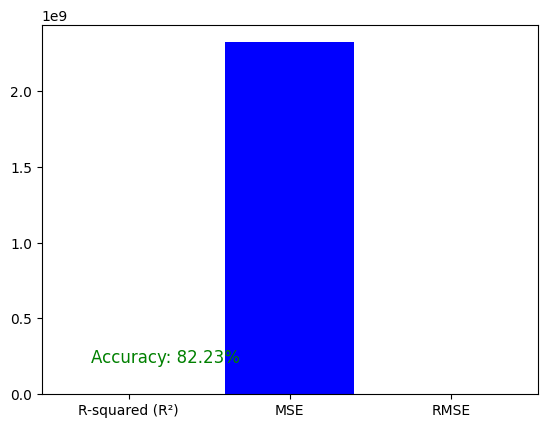

In [68]:
accuracy_percentage = r2 * 100 
plt.text(0.1, 0.1, f'Accuracy: {accuracy_percentage:.2f}%', 
         horizontalalignment='left', 
         verticalalignment='center', 
         transform=plt.gca().transAxes, 
         fontsize=12, color='green')
plt.bar(metrics, values, color=['green', 'blue', 'orange'])

plt.show()